Name : ธีรพงค์ ศันสนียวรรธน์ <br>
Date : 23 May 2564 <br>
Description : <br>
นำข้อมูลการเคยใช้และไม่เคยใช้ผลิตภัณฑ์ต่างๆ มาวิเคราะห์หา Product Recommendation
<br> <br>

เป็นส่วนหนึ่งของวิชา BADS 7105 Customer Analytics <br>
อาจารย์ผู้สอน ดร. ธนชาตย์ ฤทธิ์บำรุง <br> <br>
สาขาวิชาการวิเคราะธ์ธุรกิจและวิทยาการข้อมูล DS รุ่นที่ 5 <br>
คณะสถิติประยุกต์ <br>
สถาบันบัณฑิตพัฒนบริหารศาสตร์ (นิด้า) NIDA <br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import networkx as nx
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
# Add Thai Font
# ที่มา https://www.facebook.com/groups/colab.thailand/permalink/1421960354645985/
import matplotlib as mpl
plt.rcParams['font.family']='K2D'
mpl.font_manager.fontManager.addfont('./fonts/K2D-Regular.ttf')
mpl.rc('font', family='K2D', size=12, weight=200)

# omit trucated data
# pd.set_option("display.max_rows", None, "display.max_columns", None)

In [3]:
# Load data
survey_df = pd.read_excel('./data/Customer Preference Survey.xlsx')
print("Dimension : ",survey_df.shape)
survey_df.head()

Dimension :  (45, 62)


,ประทับเวลา,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,...,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
0,2021-03-20 11:53:44.586,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,...,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย
1,2021-03-20 11:54:00.984,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,...,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย
2,2021-03-20 11:54:05.084,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,...,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย
3,2021-03-20 11:54:12.558,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,...,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย
4,2021-03-20 11:54:18.477,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,...,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย


In [4]:
# survey_df = survey_df.drop('ประทับเวลา',axis=1).reset_index().rename(columns={'index':'นักศึกษา'})
survey_df = survey_df.drop('ประทับเวลา',axis=1)
survey_df.head()

,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,...,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
0,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,...,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย
1,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,...,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย
2,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,...,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย
3,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,...,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย
4,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,...,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย


In [5]:
# check all posible value in data frame
survey_df.melt()['value'].value_counts(dropna=False)

ไม่เคย    1684
เคย       1055
NaN          6
Name: value, dtype: int64

In [6]:
# convert all string to number
survey_df.replace({'เคย': 1, 'ไม่เคย': 0}, inplace=True)
survey_df.fillna(0, inplace=True)
survey_df.melt()['value'].value_counts(dropna=False)

0.0    1690
1.0    1055
Name: value, dtype: int64

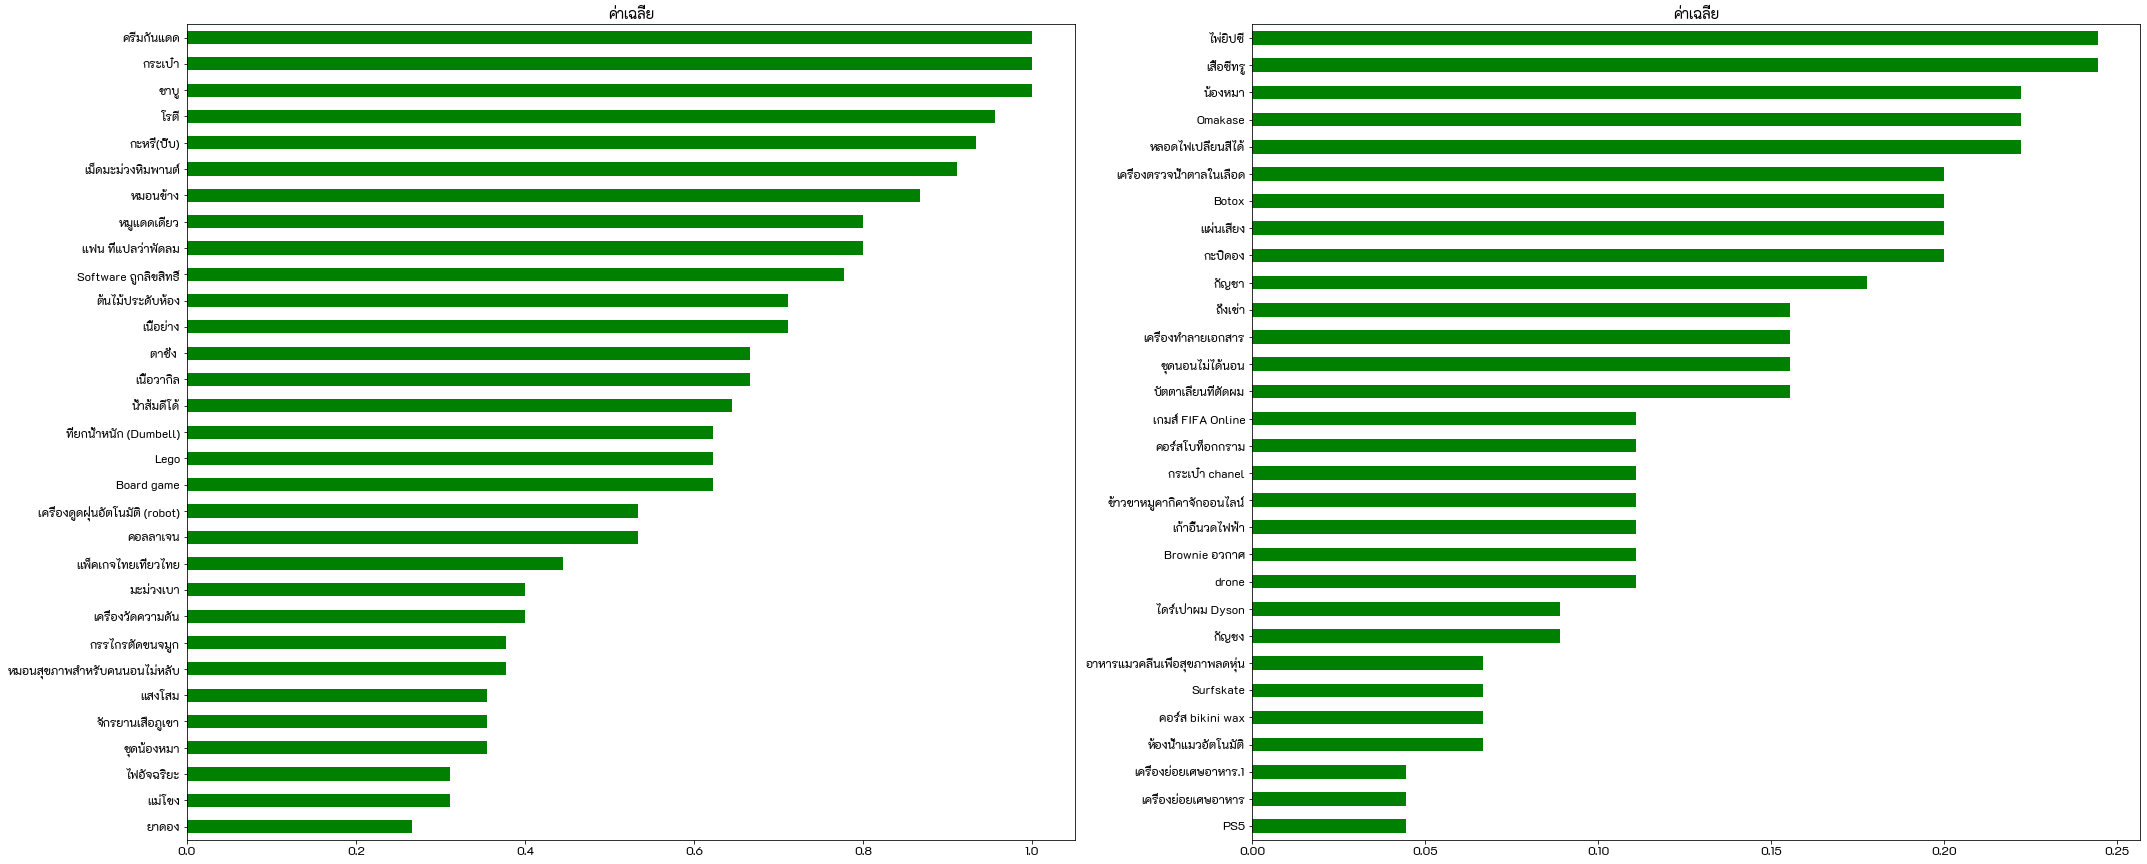

In [7]:
fig, axes = plt.subplots(1,2, figsize=(35,15))
colors = ['green','.9']
mean_df = survey_df.mean().sort_values().to_frame()
mean_df[30:].plot.barh(stacked=True, color=colors, ax=axes[0], title='ค่าเฉลี่ย', legend=False)
mean_df[:30].plot.barh(stacked=True, color=colors, ax=axes[1], title='ค่าเฉลี่ย', legend=False)
plt.show()

# Market Basket Analysis

In [8]:
frequent_itemsets = apriori(survey_df, min_support=0.5, use_colnames=True)
frequent_itemsets.head()

,support,itemsets
0,0.533333,(คอลลาเจน)
1,0.711111,(ต้นไม้ประดับห้อง)
2,0.866667,(หมอนข้าง)
3,0.666667,(ตาชั่ง )
4,0.933333,(กะหรี่(ปั๊บ))


In [9]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets[(frequent_itemsets['length'] > 1)]

,support,itemsets,length
20,0.511111,"(กะหรี่(ปั๊บ), คอลลาเจน)",2
21,0.533333,"(กระเป๋า, คอลลาเจน)",2
22,0.533333,"(ชาบู, คอลลาเจน)",2
23,0.533333,"(โรตี, คอลลาเจน)",2
24,0.533333,"(ครีมกันแดด, คอลลาเจน)",2
...,...,...,...
4418,0.511111,"(ครีมกันแดด, กะหรี่(ปั๊บ), เนื้อย่าง, โรตี, กร...",9
4419,0.555556,"(ครีมกันแดด, กะหรี่(ปั๊บ), เนื้อย่าง, โรตี, กร...",9
4420,0.511111,"(ครีมกันแดด, กะหรี่(ปั๊บ), เนื้อย่าง, โรตี, กร...",9
4421,0.511111,"(หมอนข้าง, ครีมกันแดด, กะหรี่(ปั๊บ), เนื้อย่าง...",10


In [10]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(กะหรี่(ปั๊บ)),(คอลลาเจน),0.933333,0.533333,0.511111,0.547619,1.026786,0.013333,1.031579
1,(คอลลาเจน),(กะหรี่(ปั๊บ)),0.533333,0.933333,0.511111,0.958333,1.026786,0.013333,1.600000
2,(กระเป๋า),(คอลลาเจน),1.000000,0.533333,0.533333,0.533333,1.000000,0.000000,1.000000
3,(คอลลาเจน),(กระเป๋า),0.533333,1.000000,0.533333,1.000000,1.000000,0.000000,inf
4,(ชาบู),(คอลลาเจน),1.000000,0.533333,0.533333,0.533333,1.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...
242896,(กระเป๋า),"(หมอนข้าง, ครีมกันแดด, กะหรี่(ปั๊บ), เนื้อย่าง...",1.000000,0.511111,0.511111,0.511111,1.000000,0.000000,1.000000
242897,(เนื้อวากิล),"(หมอนข้าง, ครีมกันแดด, กะหรี่(ปั๊บ), เนื้อย่าง...",0.666667,0.555556,0.511111,0.766667,1.380000,0.140741,1.904762
242898,(ชาบู),"(หมอนข้าง, ครีมกันแดด, กะหรี่(ปั๊บ), เนื้อย่าง...",1.000000,0.511111,0.511111,0.511111,1.000000,0.000000,1.000000
242899,(หมูแดดเดียว),"(หมอนข้าง, ครีมกันแดด, กะหรี่(ปั๊บ), เนื้อย่าง...",0.800000,0.533333,0.511111,0.638889,1.197917,0.084444,1.292308


In [11]:
print("Before Dimension : ",rules.shape)
rules.describe()

Before Dimension :  (242901, 9)


,antecedent support,consequent support,support,confidence,lift,leverage,conviction
count,242901.000000,242901.000000,242901.000000,242901.000000,242901.000000,242901.000000,2.429010e+05
mean,0.712353,0.712330,0.552424,0.797353,1.125420,0.056932,inf
std,0.132985,0.132976,0.053200,0.134891,0.098806,0.038588,NaN
min,0.511111,0.511111,0.511111,0.511111,1.000000,0.000000,1.000000e+00
25%,0.600000,0.600000,0.511111,0.688889,1.053659,0.029136,1.200000e+00
50%,0.688889,0.688889,0.533333,0.805556,1.105769,0.052840,1.503704e+00
75%,0.800000,0.800000,0.577778,0.903226,1.170814,0.080000,2.200000e+00
max,1.000000,1.000000,1.000000,1.000000,1.483516,0.176790,inf


In [12]:
filter_confidence = rules['confidence'] >= 0.8
filter_support = rules['support'] >= 0.6
filter_lift = rules['lift'] >=1.2

filter_rules = rules[filter_confidence&filter_support&filter_lift]
print("After Dimension : ",filter_rules.shape)

After Dimension :  (1512, 9)


In [13]:
rules['antecedents'] = rules.antecedents.apply(lambda x: next(iter(x)))
rules['consequents'] = rules.consequents.apply(lambda x: next(iter(x)))
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,กะหรี่(ปั๊บ),คอลลาเจน,0.933333,0.533333,0.511111,0.547619,1.026786,0.013333,1.031579
1,คอลลาเจน,กะหรี่(ปั๊บ),0.533333,0.933333,0.511111,0.958333,1.026786,0.013333,1.600000
2,กระเป๋า,คอลลาเจน,1.000000,0.533333,0.533333,0.533333,1.000000,0.000000,1.000000
3,คอลลาเจน,กระเป๋า,0.533333,1.000000,0.533333,1.000000,1.000000,0.000000,inf
4,ชาบู,คอลลาเจน,1.000000,0.533333,0.533333,0.533333,1.000000,0.000000,1.000000


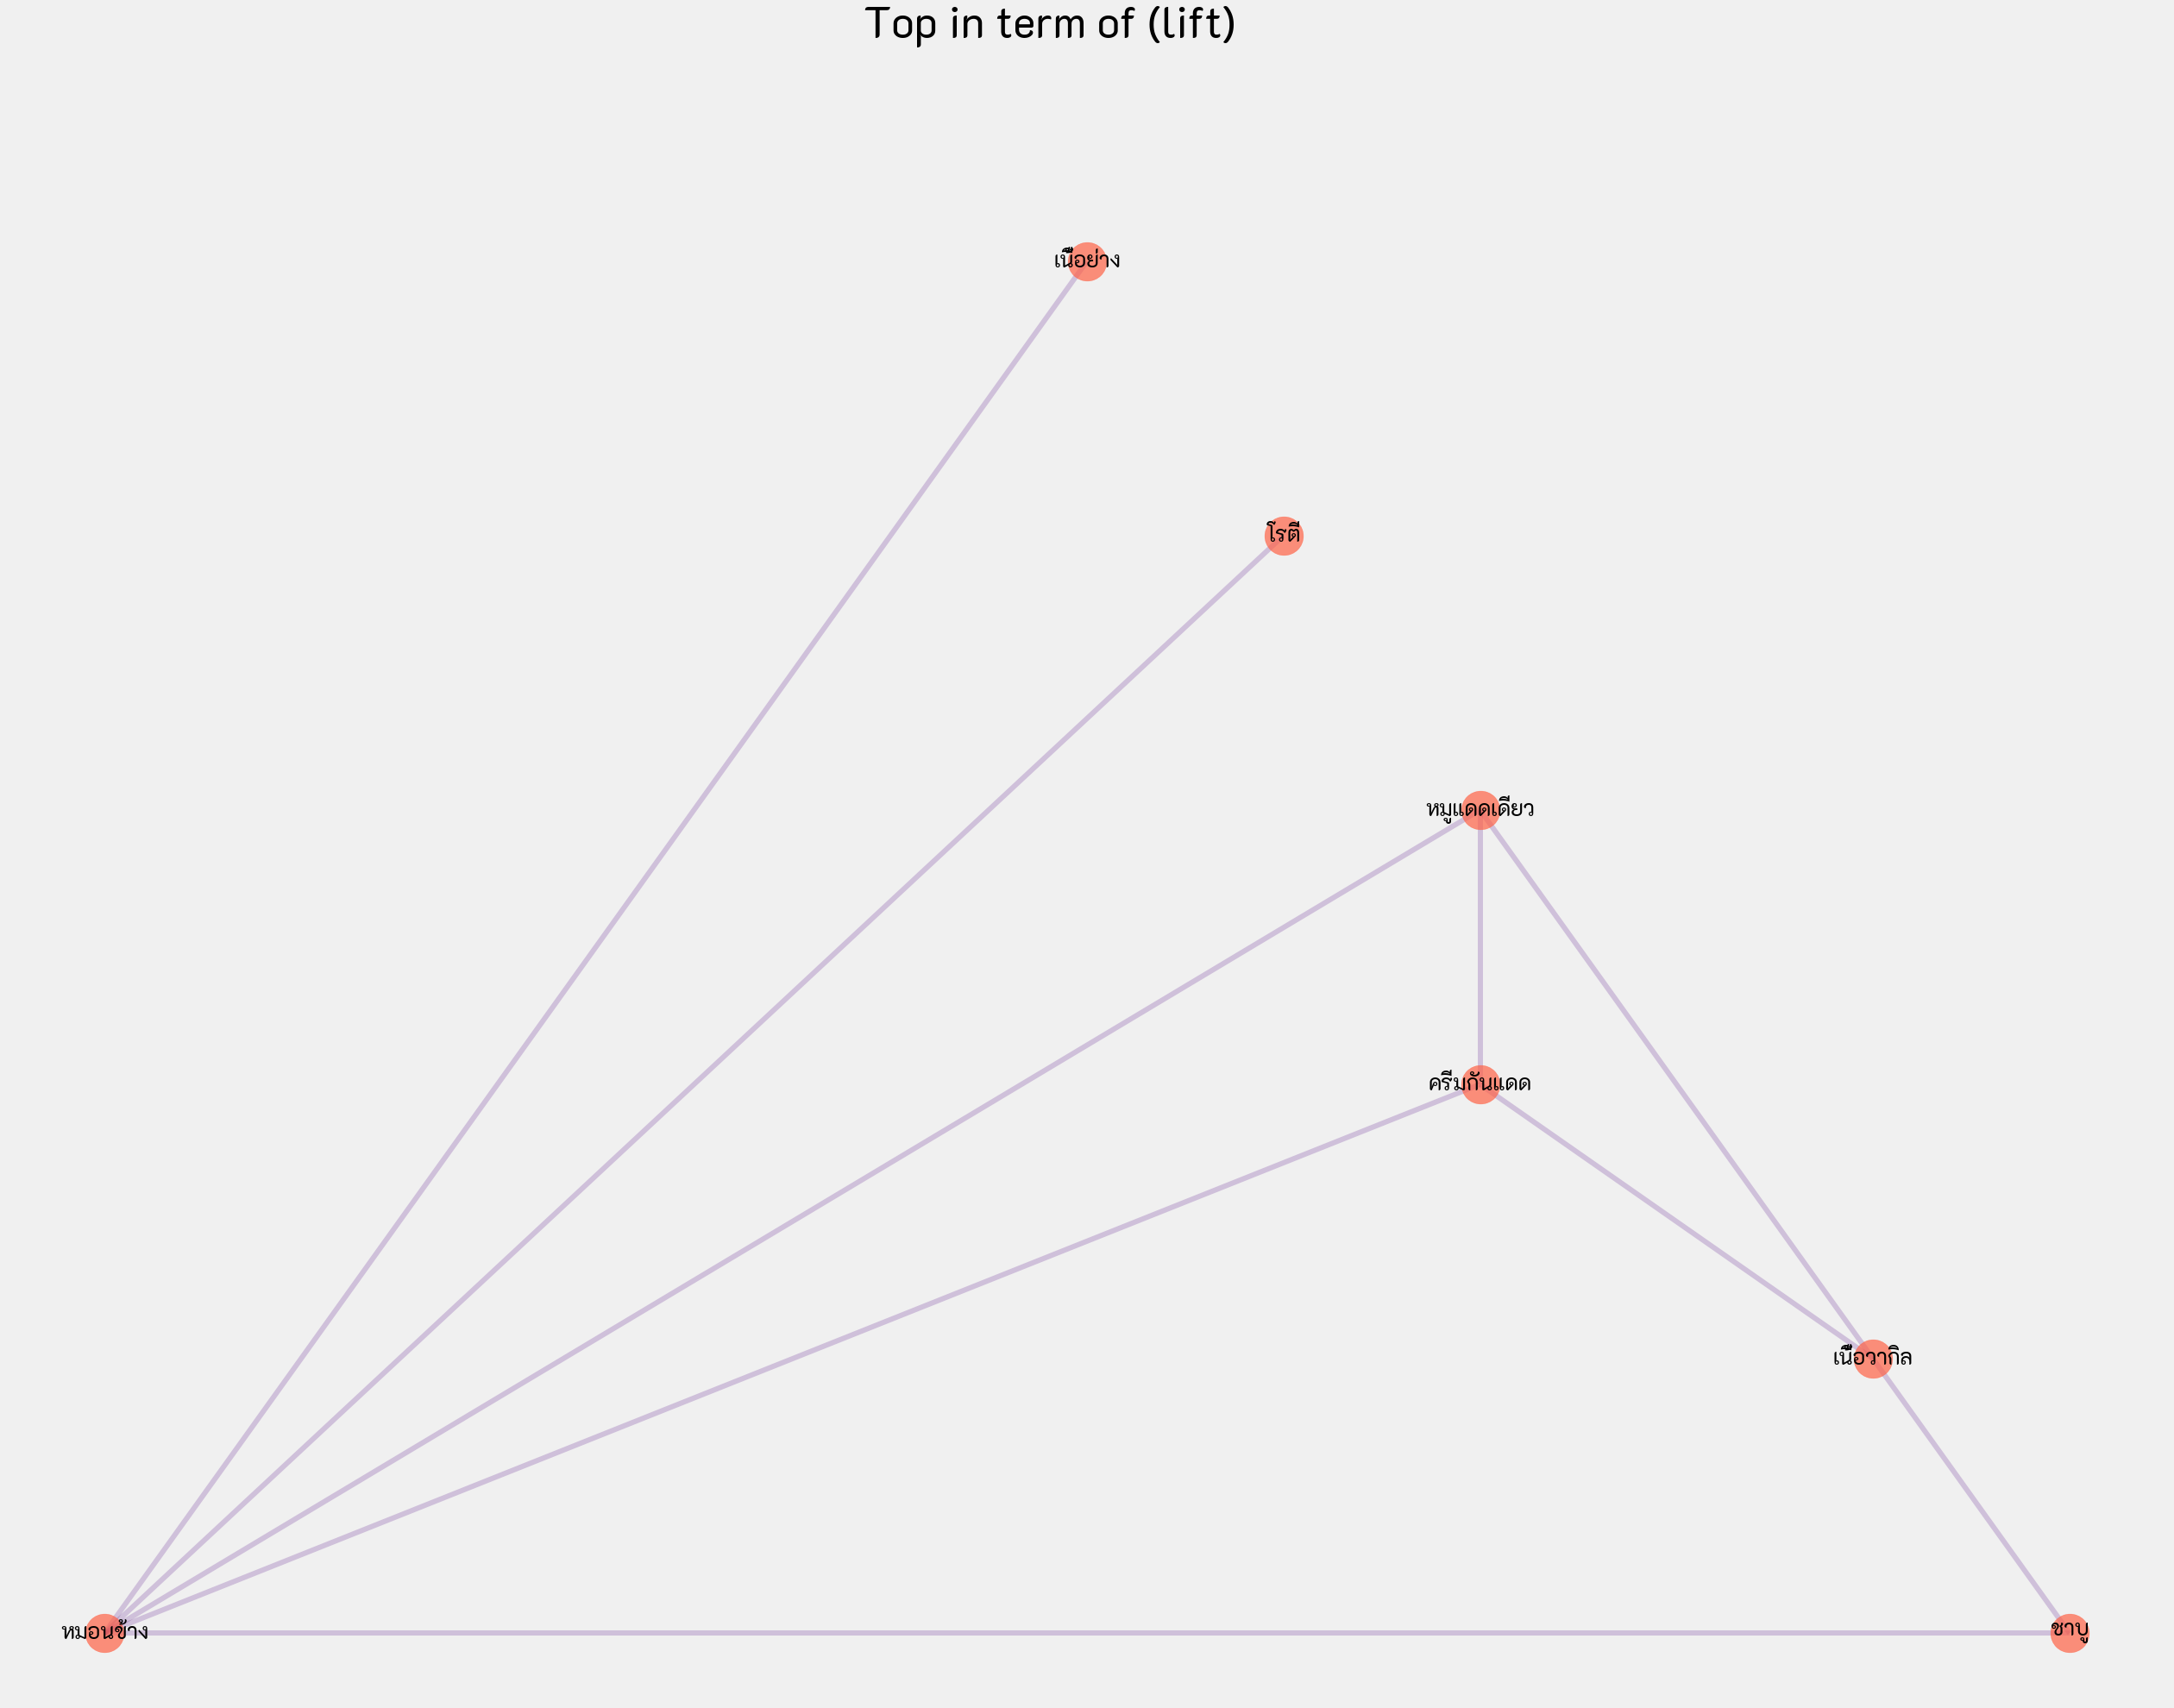

In [14]:
import networkx as nx
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
edges = nx.from_pandas_edgelist(rules.sort_values(ascending=False,by='lift').head(500)
                           ,source='antecedents',target='consequents',edge_attr=None)
plt.subplots(figsize=(40,30))
plt.suptitle('Top in term of (lift)', fontsize = 50,fontweight = 'bold')
pos = nx.planar_layout(edges)
nx.draw_networkx_nodes(edges, pos, node_size = 2000,alpha= 0.7,node_color = 'tomato')
nx.draw_networkx_edges(edges, pos, width = 6, alpha = 0.2, edge_color = 'indigo')
nx.draw_networkx_labels(edges, pos, font_size = 25, font_family = 'K2D')
plt.grid()
# plt.axis('off')
# plt.tight_layout()
plt.show()
